In [1]:
# Build a model that can predict prices of cars with different model, age and mileage


In [17]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [18]:
# load the dataset
df = pd.read_csv('carprices.csv')

# inspect dataset
print(df)
print(df.describe())

   Car Model  Mileage  Sell Price($)  Age(yrs)
0     BMW X5    69000          18000         6
1     BMW X5    35000          34000         3
2     BMW X5    57000          26100         5
3     BMW X5    22500          40000         2
4     BMW X5    46000          31500         4
5    Audi A5    59000          29400         5
6    Audi A5    52000          32000         5
7    Audi A5    72000          19300         6
8    Audi A5    91000          12000         8
9   Mercedez    67000          22000         6
10  Mercedez    83000          20000         7
11  Mercedez    79000          21000         7
12  Mercedez    59000          33000         5
            Mileage  Sell Price($)   Age(yrs)
count     13.000000      13.000000  13.000000
mean   60884.615385   26023.076923   5.307692
std    19185.665055    8003.661021   1.652504
min    22500.000000   12000.000000   2.000000
25%    52000.000000   20000.000000   5.000000
50%    59000.000000   26100.000000   5.000000
75%    72000.000000 

In [1]:
# plot chart to see if linear regression model can be applied

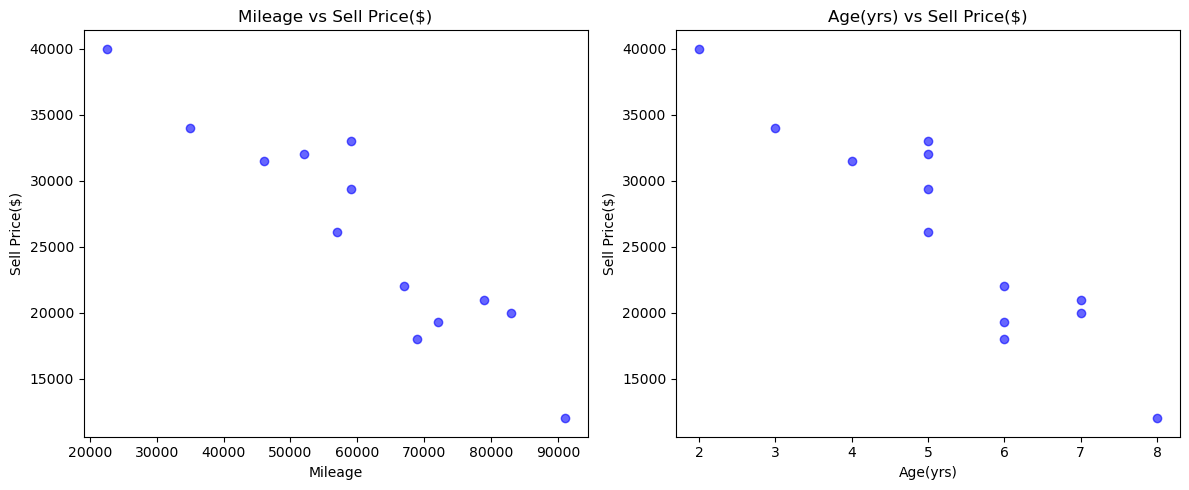

In [20]:
# scatter plot for each numeric feature
# shows linear pattern for each feature
features = ['Mileage','Age(yrs)']
plt.figure(figsize=(12,5))

for i,feature in enumerate(features):
    plt.subplot(1,len(features),i+1)
    plt.scatter(df[feature], df['Sell Price($)'], color='blue', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel("Sell Price($)")
    plt.title(f"{feature} vs Sell Price($)")

plt.tight_layout()
plt.show()

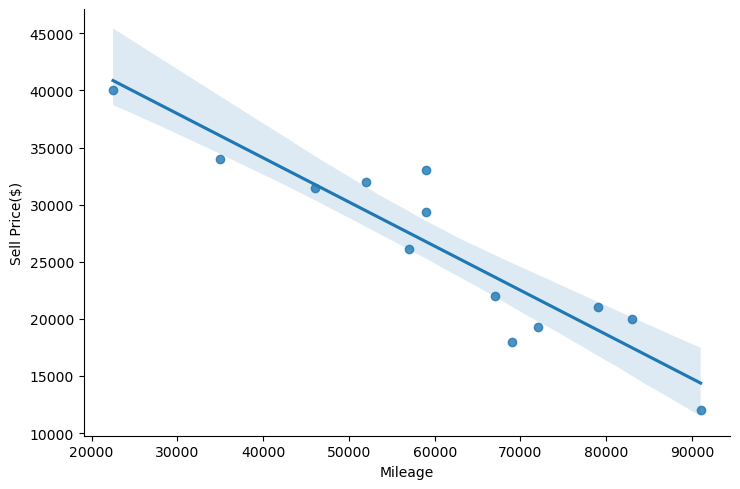

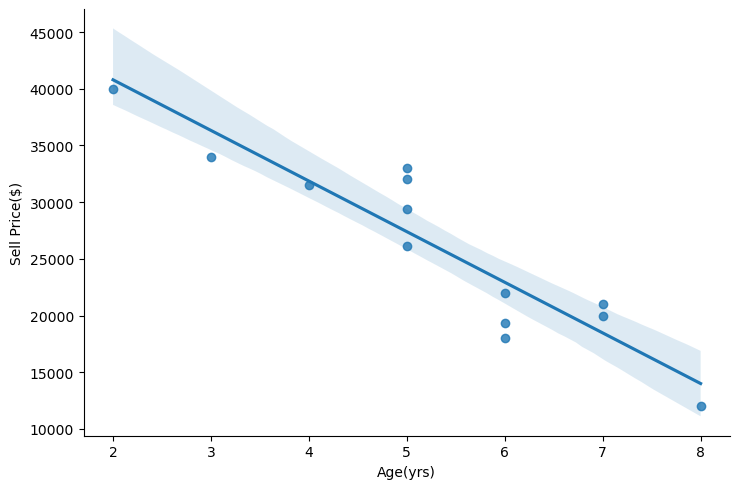

In [21]:
# seaborn for regression hint
# checks direction of relationship
# strength of relationship
# the lmplot shows linear trend
# helps to decide if Linear Regression is suitable
# width = height * aspect
sns.lmplot(x='Mileage', y='Sell Price($)', data=df, height=5, aspect=1.5)
sns.lmplot(x='Age(yrs)', y='Sell Price($)', data=df, height=5, aspect=1.5)
plt.show()

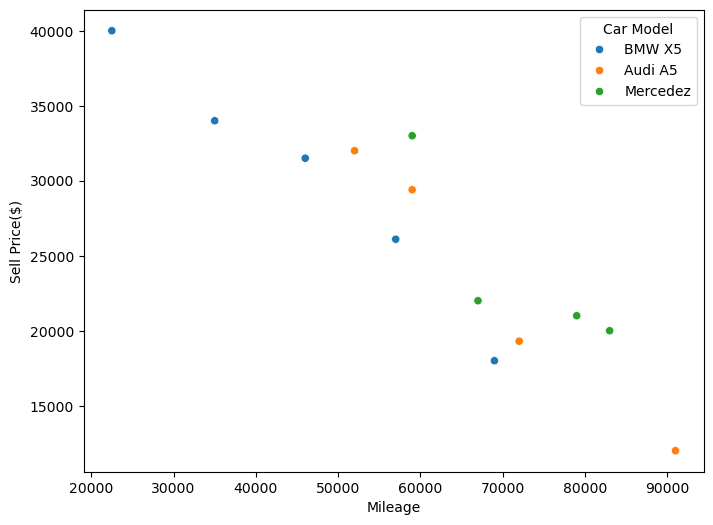

In [22]:
# use hue to check if certain car models deviate from linearity
plt.figure(figsize=(8,6))
sns.scatterplot(x='Mileage',y='Sell Price($)',hue='Car Model',data=df,palette='tab10')
plt.show()

In [23]:
# create dummies
dummies = pd.get_dummies(df['Car Model'])
print(dummies)

    Audi A5  BMW X5  Mercedez
0     False    True     False
1     False    True     False
2     False    True     False
3     False    True     False
4     False    True     False
5      True   False     False
6      True   False     False
7      True   False     False
8      True   False     False
9     False   False      True
10    False   False      True
11    False   False      True
12    False   False      True


In [25]:
# merge the dataset with the dummies 
merged_df = pd.concat([df,dummies],axis='columns')
print(merged_df)

   Car Model  Mileage  Sell Price($)  Age(yrs)  Audi A5  BMW X5  Mercedez
0     BMW X5    69000          18000         6    False    True     False
1     BMW X5    35000          34000         3    False    True     False
2     BMW X5    57000          26100         5    False    True     False
3     BMW X5    22500          40000         2    False    True     False
4     BMW X5    46000          31500         4    False    True     False
5    Audi A5    59000          29400         5     True   False     False
6    Audi A5    52000          32000         5     True   False     False
7    Audi A5    72000          19300         6     True   False     False
8    Audi A5    91000          12000         8     True   False     False
9   Mercedez    67000          22000         6    False   False      True
10  Mercedez    83000          20000         7    False   False      True
11  Mercedez    79000          21000         7    False   False      True
12  Mercedez    59000          33000  

In [27]:
# drop the Car Model and one dummy column
df_final = merged_df.drop(['Car Model','Mercedez'],axis='columns')
print(df_final)

    Mileage  Sell Price($)  Age(yrs)  Audi A5  BMW X5
0     69000          18000         6    False    True
1     35000          34000         3    False    True
2     57000          26100         5    False    True
3     22500          40000         2    False    True
4     46000          31500         4    False    True
5     59000          29400         5     True   False
6     52000          32000         5     True   False
7     72000          19300         6     True   False
8     91000          12000         8     True   False
9     67000          22000         6    False   False
10    83000          20000         7    False   False
11    79000          21000         7    False   False
12    59000          33000         5    False   False


In [28]:
# declare feature and target variables
X = df_final[['Mileage','Age(yrs)','Audi A5','BMW X5']]
y = df['Sell Price($)']

In [29]:
# create and train model
model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
# example 1: predict price of a mercedez benz that is 4 yr old with mileage 45000
new_features = pd.DataFrame({'Mileage':[45000],'Age(yrs)':[4],'Audi A5':[0],'BMW X5':[0]})
pred_price = model.predict(new_features)
print("Predicted price (US$):", pred_price)

Predicted price (US$): [36991.31721061]


In [38]:
# example 2: predict price of a BMW X5 that is 7 yr old with mileage 86000
new_features = pd.DataFrame({'Mileage':[86000],'Age(yrs)':[7],'Audi A5':[0],'BMW X5':[1]})
pred_price = model.predict(new_features)
print("Predicted price (US$):", pred_price)

Predicted price (US$): [11080.74313219]


In [42]:
# value score (accuracy) of the model
print(f"Accuracy: {model.score(X,y)*100:.2f}%")

Accuracy: 94.17%
